## Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os

# Define the path to your zip file
zip_path = "/content/drive/MyDrive/P_For MLDS Project.zip"

# Define the folder to extract to
extract_folder = "/content/unzipped_project"

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("File unzipped successfully!")

# List the contents to see what was extracted
print("Extracted files:")
print(os.listdir(extract_folder))

File unzipped successfully!
Extracted files:
['c134b13a-becc-4a2a-8bad-1437aceea312_Data.csv', 'c134b13a-becc-4a2a-8bad-1437aceea312_Series - Metadata.csv', '.ipynb_checkpoints', 'World Bank dataset.csv']


In [ ]:
# Load the dataset
df = pd.read_csv("/content/unzipped_project/World Bank dataset.csv")  # Replace with your file path
print("Data Loaded Successfully")

Data Loaded Successfully


## Initial Exploration

In [ ]:
# Basic overview
print("\n--- Dataset Info ---")
print(df.info())



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3909 entries, 0 to 3908
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   3906 non-null   object
 1   Country Code   3904 non-null   object
 2   Series Name    3904 non-null   object
 3   Series Code    3904 non-null   object
 4   1960 [YR1960]  3904 non-null   object
 5   1961 [YR1961]  3904 non-null   object
 6   1962 [YR1962]  3904 non-null   object
 7   1963 [YR1963]  3904 non-null   object
 8   1964 [YR1964]  3904 non-null   object
 9   1965 [YR1965]  3904 non-null   object
 10  1966 [YR1966]  3904 non-null   object
 11  1967 [YR1967]  3904 non-null   object
 12  1968 [YR1968]  3904 non-null   object
 13  1969 [YR1969]  3904 non-null   object
 14  1970 [YR1970]  3904 non-null   object
 15  1971 [YR1971]  3904 non-null   object
 16  1972 [YR1972]  3904 non-null   object
 17  1973 [YR1973]  3904 non-null   object
 18  1974 [

In [ ]:
print("\n--- First 5 Rows ---")
print(df.head())



--- First 5 Rows ---
  Country Name Country Code  \
0  Afghanistan          AFG   
1  Afghanistan          AFG   
2  Afghanistan          AFG   
3  Afghanistan          AFG   
4  Afghanistan          AFG   

                                         Series Name        Series Code  \
0            Access to electricity (% of population)     EG.ELC.ACCS.ZS   
1  Access to electricity, rural (% of rural popul...  EG.ELC.ACCS.RU.ZS   
2  Access to electricity, urban (% of urban popul...  EG.ELC.ACCS.UR.ZS   
3     Adjusted net national income (annual % growth)  NY.ADJ.NNTY.KD.ZG   
4         Adjusted net national income (current US$)     NY.ADJ.NNTY.CD   

  1960 [YR1960] 1961 [YR1961] 1962 [YR1962] 1963 [YR1963] 1964 [YR1964]  \
0            ..            ..            ..            ..            ..   
1            ..            ..            ..            ..            ..   
2            ..            ..            ..            ..            ..   
3            ..            ..           

In [ ]:
print("\n--- Descriptive Stats ---")
print(df.describe())


--- Descriptive Stats ---
       Country Name Country Code                              Series Name  \
count          3906         3904                                     3904   
unique           34           32                                      122   
top     Afghanistan          AFG  Access to electricity (% of population)   
freq            122          122                                       32   

           Series Code 1960 [YR1960] 1961 [YR1961] 1962 [YR1962]  \
count             3904          3904          3904          3904   
unique             122           505           630           674   
top     EG.ELC.ACCS.ZS            ..            ..            ..   
freq                32          3390          3269          3227   

       1963 [YR1963] 1964 [YR1964] 1965 [YR1965]  ... 2015 [YR2015]  \
count           3904          3904          3904  ...          3904   
unique           683           687           689  ...          2656   
top               ..            .

## Check Missing Values

In [ ]:
print("\n--- Missing Values ---")
print(df.isnull().sum())



--- Missing Values ---
Country Name     3
Country Code     5
Series Name      5
Series Code      5
1960 [YR1960]    5
                ..
2020 [YR2020]    5
2021 [YR2021]    5
2022 [YR2022]    5
2023 [YR2023]    5
2024 [YR2024]    5
Length: 69, dtype: int64


## Check duplicates

In [ ]:
print(f"\nDuplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()



Duplicate rows: 2


## Replace ".." with NaN and Convert to Numeric

In [ ]:
import numpy as np

# Replace ".." with NaN
df.replace("..", np.nan, inplace=True)

# Convert all year columns to numeric
year_cols = [col for col in df.columns if '[YR' in col]
df[year_cols] = df[year_cols].apply(pd.to_numeric, errors='coerce')


<ipython-input-25-3376310910>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace("..", np.nan, inplace=True)


## Drop Indicators with Mostly Missing Values

In [ ]:
# Drop indicators with more than 60% missing years
indicator_missing_ratio = df[year_cols].isnull().mean(axis=1)
df = df[indicator_missing_ratio <= 0.6]



In [ ]:
# After dropping indicators
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1488 entries, 8 to 3903
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   1488 non-null   object 
 1   Country Code   1488 non-null   object 
 2   Series Name    1488 non-null   object 
 3   Series Code    1488 non-null   object 
 4   1960 [YR1960]  514 non-null    float64
 5   1961 [YR1961]  635 non-null    float64
 6   1962 [YR1962]  676 non-null    float64
 7   1963 [YR1963]  683 non-null    float64
 8   1964 [YR1964]  688 non-null    float64
 9   1965 [YR1965]  688 non-null    float64
 10  1966 [YR1966]  689 non-null    float64
 11  1967 [YR1967]  689 non-null    float64
 12  1968 [YR1968]  688 non-null    float64
 13  1969 [YR1969]  700 non-null    float64
 14  1970 [YR1970]  790 non-null    float64
 15  1971 [YR1971]  857 non-null    float64
 16  1972 [YR1972]  874 non-null    float64
 17  1973 [YR1973]  880 non-null    float64
 18  1974 [YR1974]

## Keep indicators with some missing early years but consistent later

In [ ]:
recent_years = [col for col in year_cols if int(col[:4]) >= 2000]
recent_data_ratio = df[recent_years].notnull().mean(axis=1)
df = df[recent_data_ratio >= 0.7]  # keep indicators with >=70% data in recent years


## Drop Countries with Insufficient Data

In [ ]:
# Count number of non-null values per country
country_valid = df.groupby('Country Name')[year_cols].apply(lambda x: x.notnull().sum().sum())

# Filter countries with at least 30% available data
valid_countries = country_valid[country_valid > 0.3 * len(year_cols) * df['Series Name'].nunique()].index
df = df[df['Country Name'].isin(valid_countries)]


In [ ]:
df.isnull().values.any()


np.True_

## Save the Cleaned Dataset

In [ ]:
df.to_csv("world_bank_cleaned.csv", index=False)


## Line Plot for Selected Indicators and Countries

In [ ]:
reshaped_df = df.melt(
    id_vars=["Country Name", "Series Name"],
    value_vars=year_cols,
    var_name="Year",
    value_name="Value"
)
reshaped_df["Year"] = reshaped_df["Year"].str.extract(r'(\d{4})').astype(int)


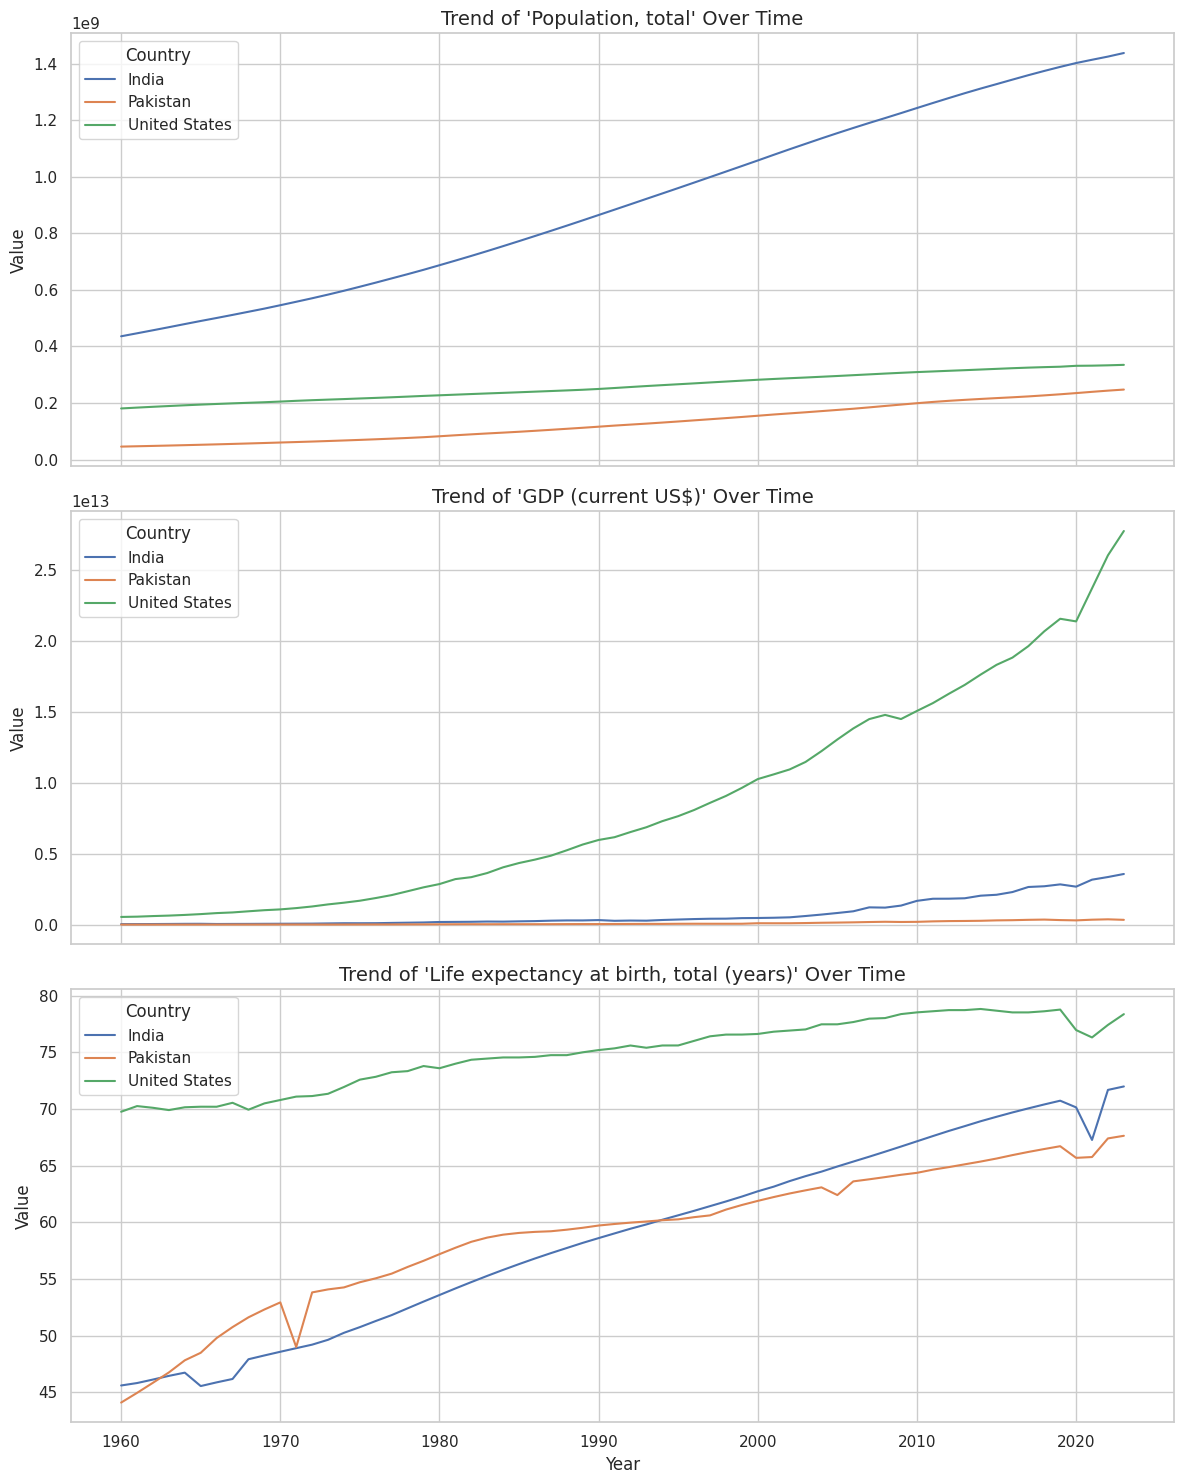

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Filter for top indicators and countries
sample_countries = ["Pakistan", "India", "China", "United States"]
sample_indicators = ["Population, total", "GDP (current US$)", "Life expectancy at birth, total (years)"]

filtered = reshaped_df[
    (reshaped_df["Country Name"].isin(sample_countries)) &
    (reshaped_df["Series Name"].isin(sample_indicators))
]

# Plot trends
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15), sharex=True)

for idx, indicator in enumerate(sample_indicators):
    sns.lineplot(
        data=filtered[filtered["Series Name"] == indicator],
        x="Year", y="Value", hue="Country Name",
        ax=axes[idx]
    )
    axes[idx].set_title(f"Trend of '{indicator}' Over Time", fontsize=14)
    axes[idx].set_ylabel("Value")
    axes[idx].legend(title="Country")

plt.tight_layout()
plt.show()


## Correlation Heatmap Between Indicators for a Country

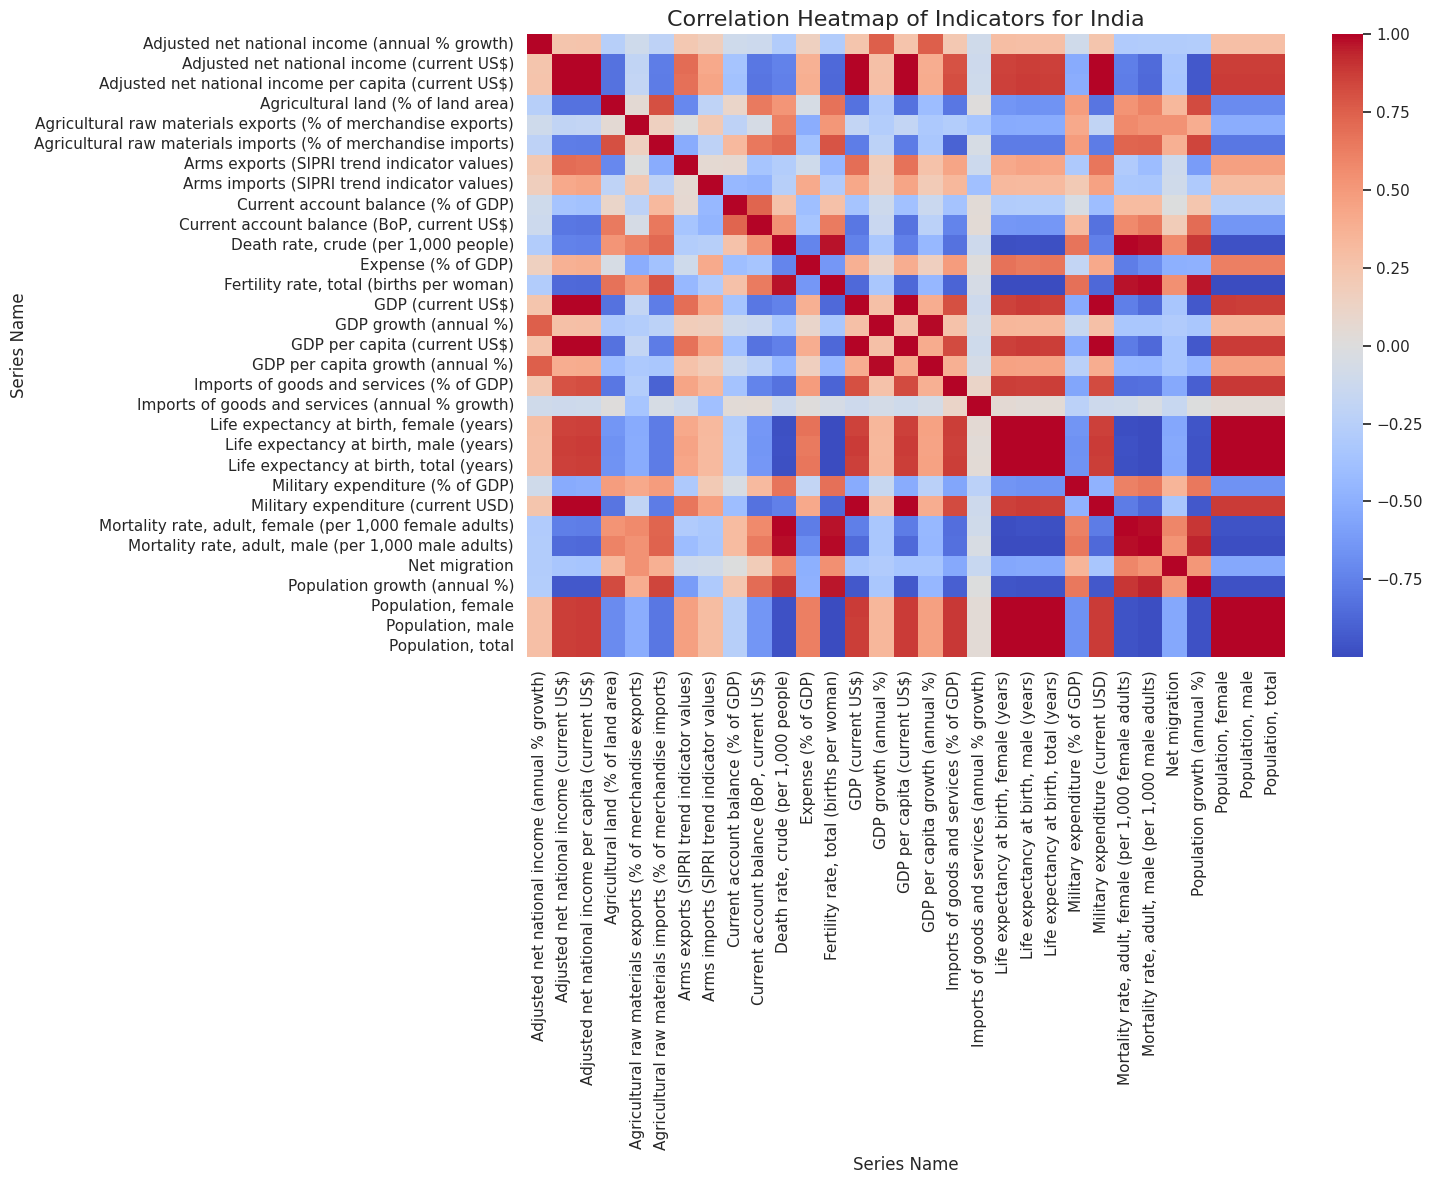

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter for one country, e.g., India
country_name = "India"
country_data = reshaped_df[reshaped_df["Country Name"] == country_name]

# Step 2: Pivot the data
pivot_df = country_data.pivot_table(
    index="Year",
    columns="Series Name",
    values="Value"
)

# Step 3: Drop indicators (columns) with too many missing values
pivot_df = pivot_df.dropna(axis=1, thresh=int(0.7 * len(pivot_df)))

# Step 4: Drop any rows with NaNs
pivot_df = pivot_df.dropna()

# Step 5: Plot correlation heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(pivot_df.corr(), cmap="coolwarm", annot=False)
plt.title(f"Correlation Heatmap of Indicators for {country_name}", fontsize=16)
plt.tight_layout()
plt.show()



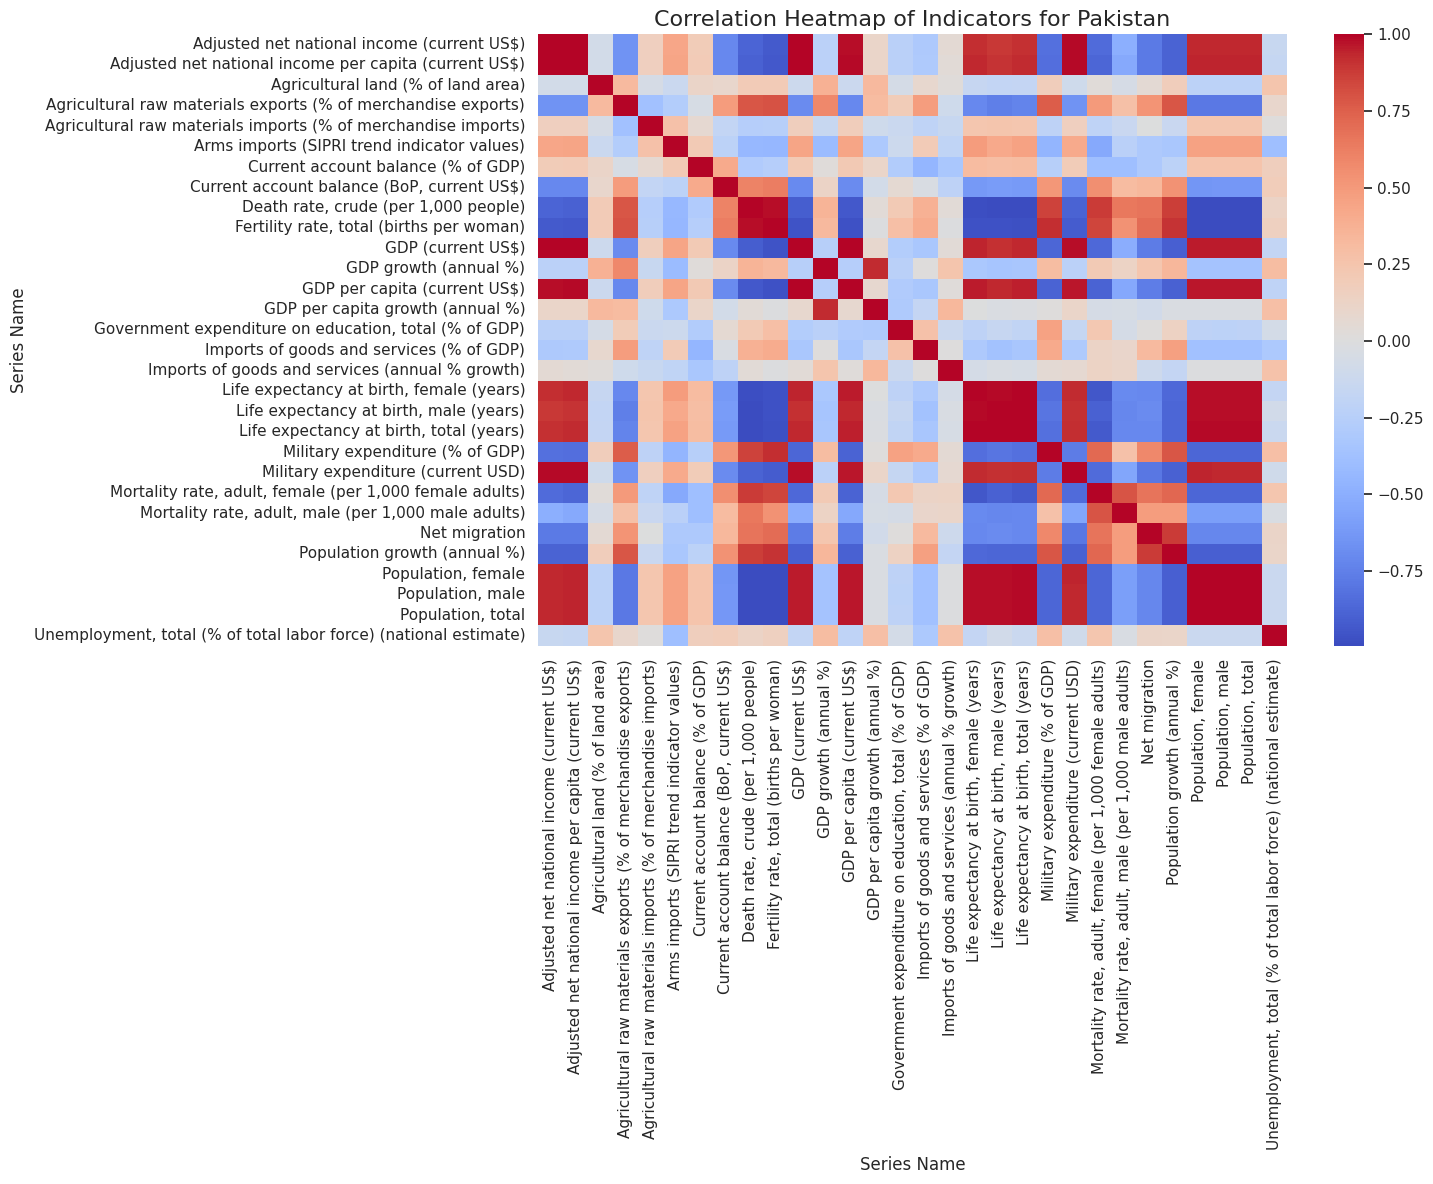

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter for one country, e.g., Pakistan
country_name = "Pakistan"
country_data = reshaped_df[reshaped_df["Country Name"] == country_name]

# Step 2: Pivot the data
pivot_df = country_data.pivot_table(
    index="Year",
    columns="Series Name",
    values="Value"
)

# Step 3: Drop indicators (columns) with too many missing values
pivot_df = pivot_df.dropna(axis=1, thresh=int(0.7 * len(pivot_df)))

# Step 4: Drop any rows with NaNs
pivot_df = pivot_df.dropna()

# Step 5: Plot correlation heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(pivot_df.corr(), cmap="coolwarm", annot=False)
plt.title(f"Correlation Heatmap of Indicators for {country_name}", fontsize=16)
plt.tight_layout()
plt.show()


## Distribution of Values for a Specific Indicator

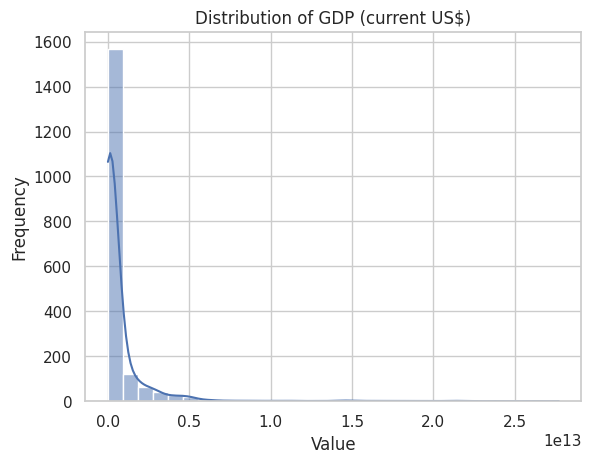

In [ ]:
indicator = "GDP (current US$)"
subset = reshaped_df[reshaped_df["Series Name"] == indicator]

sns.histplot(subset["Value"].dropna(), bins=30, kde=True)
plt.title(f"Distribution of {indicator}")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


TCN

In [ ]:
!pip install keras-tcn --quiet


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from tcn import TCN
from sklearn.preprocessing import MinMaxScaler

# If not already reshaped:
X_train_tcn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_tcn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build TCN model
model_tcn = Sequential()
model_tcn.add(TCN(input_shape=(X_train_tcn.shape[1], 1)))
model_tcn.add(Dense(1))  # Output layer

model_tcn.compile(optimizer='adam', loss='mse')
model_tcn.summary()

# Train the model
model_tcn.fit(X_train_tcn, y_train, epochs=100, batch_size=4, verbose=1)


/usr/local/lib/python3.11/dist-packages/tcn/tcn.py:268: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super(TCN, self).__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ tcn (TCN)                       │ (None, 64)             │       136,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,321 (532.50 KB)

 Trainable params: 136,321 (532.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - loss: 0.0137
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0050
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0051
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0018
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.3616e-04
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0018
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0013
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0013
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 9.3382e-04
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 3.5564e-04
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 3.0993e-04
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.8217e-04
Epoch 13/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.1334e-04
Epoch 14/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.4146e-04
Epoch 15/100
12/12 ━━━━━━━━━

Evaluation

In [ ]:
# Make predictions
y_pred_tcn = model_tcn.predict(X_test_tcn)

# Inverse transform to get actual values
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred_tcn)

# Display results
for actual, predicted in zip(y_test_inv.flatten(), y_pred_inv.flatten()):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Actual: 1827637590410.41, Predicted: 1786574798848.00
Actual: 1856721507621.58, Predicted: 1992542388224.00
Actual: 2039126479154.52, Predicted: 1988049633280.00
Actual: 2103588360044.94, Predicted: 2108576890880.00
Actual: 2294796885663.16, Predicted: 2186095493120.00
Actual: 2651474262755.45, Predicted: 2416428187648.00
Actual: 2702929641648.74, Predicted: 2690442854400.00
Actual: 2835606256558.19, Predicted: 2818196635648.00
Actual: 2674851578587.27, Predicted: 3029160165376.00
Actual: 3167270623260.47, Predicted: 2837781151744.00
Actual: 3353470496886.33, Predicted: 3283050037248.00
Actual: 3567551674623.01, Predicted: 3337967108096.00


Plot Results

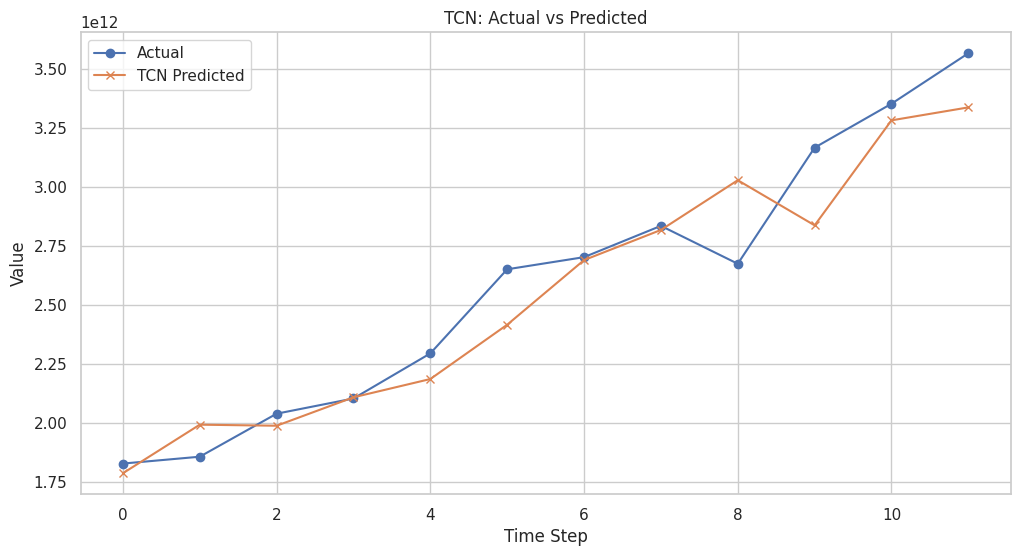

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual', marker='o')
plt.plot(y_pred_inv, label='TCN Predicted', marker='x')
plt.title("TCN: Actual vs Predicted")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


Reshape

In [ ]:
# Reshape input data for GRU
X_train_gru = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_gru = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


Build GRU Model



In [ ]:
from keras.models import Sequential
from keras.layers import GRU, Dense

# Define GRU model
gru_model = Sequential()
gru_model.add(GRU(64, input_shape=(X_train_gru.shape[1], 1), return_sequences=False))
gru_model.add(Dense(1))  # Final output layer

gru_model.compile(optimizer='adam', loss='mse')
gru_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 64)             │        12,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,929 (50.50 KB)

 Trainable params: 12,929 (50.50 KB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [ ]:
gru_model.fit(X_train_gru, y_train, epochs=100, batch_size=4, verbose=1)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0306
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0075
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0077
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0032
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0020
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.2302e-04
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.0278e-04
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.7256e-04
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.7990e-04
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.3209e-04
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.5052e-04
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2194e-04
Epoch 13/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4172e-04 
Epoch 14/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5893e-04 
Epoch 15/100
12/12 ━━━━

Predict and Inverse Transform

In [ ]:
y_pred_gru = gru_model.predict(X_test_gru)

# Inverse transform to get original scale
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred_gru)

# Show actual vs predicted
for actual, predicted in zip(y_test_inv.flatten(), y_pred_inv.flatten()):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step
Actual: 1827637590410.41, Predicted: 2166240313344.00
Actual: 1856721507621.58, Predicted: 2375461634048.00
Actual: 2039126479154.52, Predicted: 2506402824192.00
Actual: 2103588360044.94, Predicted: 2654203019264.00
Actual: 2294796885663.16, Predicted: 2798405550080.00
Actual: 2651474262755.45, Predicted: 2990947172352.00
Actual: 2702929641648.74, Predicted: 3320034885632.00
Actual: 2835606256558.19, Predicted: 3627539759104.00
Actual: 2674851578587.27, Predicted: 3883949883392.00
Actual: 3167270623260.47, Predicted: 3960744181760.00
Actual: 3353470496886.33, Predicted: 4194032418816.00
Actual: 3567551674623.01, Predicted: 4535574069248.00


Plot Results

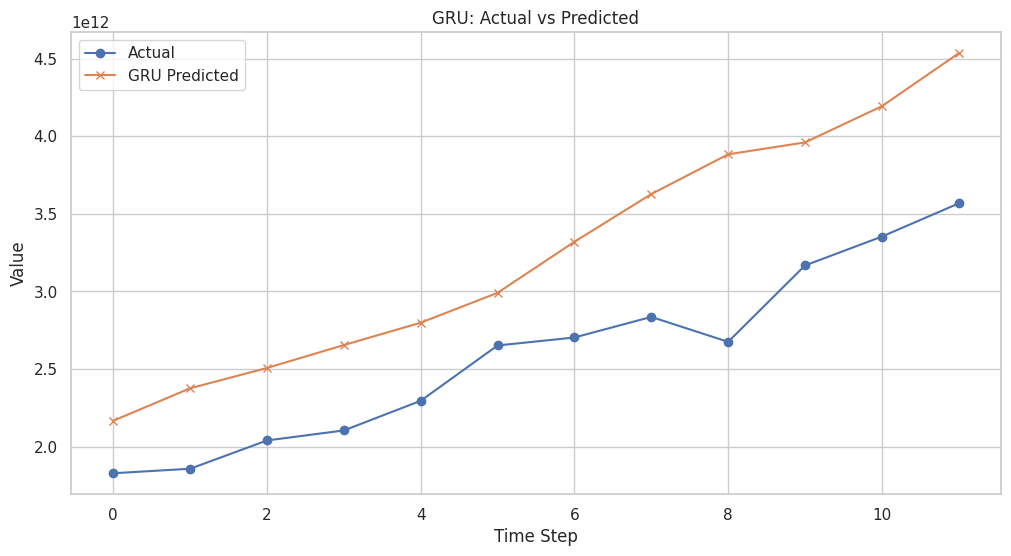

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual', marker='o')
plt.plot(y_pred_inv, label='GRU Predicted', marker='x')
plt.title("GRU: Actual vs Predicted")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


Reshape

In [ ]:
# Reshape input data for LSTM
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


Define and Compile the LSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Create the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(64, input_shape=(X_train_lstm.shape[1], 1)))
lstm_model.add(Dense(1))  # Output layer for regression

# Compile the model
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [ ]:
lstm_model.fit(X_train_lstm, y_train, epochs=100, batch_size=4, verbose=1)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0302
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0059
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0032
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.4603e-04
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.8047e-04 
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.9335e-04
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.5339e-04
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6599e-04
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.7553e-04
Epoch 13/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.7456e-04
Epoch 14/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.3472e-04
Epoch 15/100
12/12 ━━━━━━━━━━━━━━

Predict and Compare Actual vs Predicted

In [ ]:
# Predict on test set
y_pred_lstm = lstm_model.predict(X_test_lstm)

# Inverse transform predictions and true values
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred_lstm)

# Print predictions
for actual, predicted in zip(y_test_inv.flatten(), y_pred_inv.flatten()):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
Actual: 1827637590410.41, Predicted: 2131735347200.00
Actual: 1856721507621.58, Predicted: 2387146440704.00
Actual: 2039126479154.52, Predicted: 2654846320640.00
Actual: 2103588360044.94, Predicted: 2905136693248.00
Actual: 2294796885663.16, Predicted: 3071015387136.00
Actual: 2651474262755.45, Predicted: 3252174979072.00
Actual: 2702929641648.74, Predicted: 3560230354944.00
Actual: 2835606256558.19, Predicted: 3936674906112.00
Actual: 2674851578587.27, Predicted: 4307229605888.00
Actual: 3167270623260.47, Predicted: 4622520418304.00
Actual: 3353470496886.33, Predicted: 4952874811392.00
Actual: 3567551674623.01, Predicted: 5248268632064.00


Plot the Results

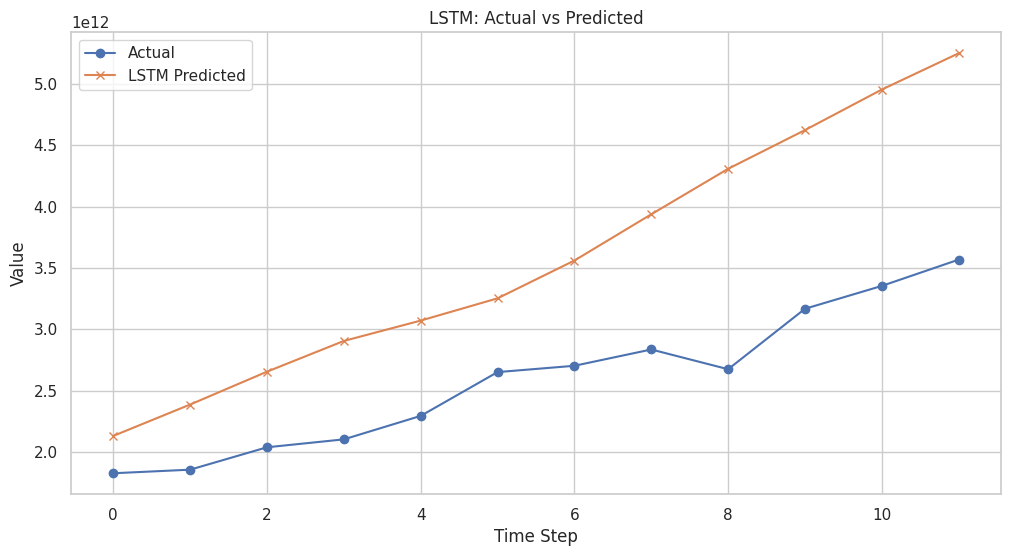

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual', marker='o')
plt.plot(y_pred_inv, label='LSTM Predicted' , marker='x')
plt.title("LSTM: Actual vs Predicted")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


## Interpretation:
Most GDP values are heavily skewed to the left (closer to zero).

A very small number of countries have extremely large GDP values (to the right).

This distribution is positively skewed (long tail on the right), which is typical for economic indicators like GDP — a few rich countries have very high values, while most have moderate to low GDP.